# COMP4160_Yinjie_Liu_20211091_Assignment2_2

In this notebook, I have implemented different binary classification models according to different classifiers to classify the previously saved data. However, before the model training, a series of data preprocessing is needed, including word segmentation, stop words removal, punctuation and stem extraction.  
In the first task, I implemented three classification models based on the logistic regression classifier, the decision tree classifier and the polynomial naive Bayes classifier. In the second task, I implemented two classification models based on the K-nearest neighbor classifier and the logistic regression classifier. Next, I will show the detail about the process I completed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from itertools import accumulate
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import joblib    #joblib模块
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yinjie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data analysis

Count the sentence length and the frequency of its occurrence.

In [2]:
df=pd.read_csv('data.csv')
print(df.groupby('Label')['Label'].count())

Label
0    4045
1    5199
Name: Label, dtype: int64


In [3]:
df['length']=df['Review'].apply(lambda x:len(x))
len_df=df.groupby('length').count()
sent_length=len_df.index.tolist()
sent_freq=len_df['Review'].tolist()

In [4]:
max(sent_length)
max(sent_freq)

69

Draw a statistical chart of sentence length and frequency.

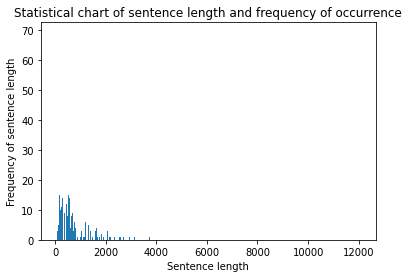

In [5]:
plt.bar(sent_length,sent_freq)
plt.title('Statistical chart of sentence length and frequency of occurrence')
plt.xlabel('Sentence length')
plt.ylabel('Frequency of sentence length')
plt.show()
plt.close()

Draw sentence length cumulative distribution function (CDF)


 The sentence length is 1733 in the quantile dimension 0.91.


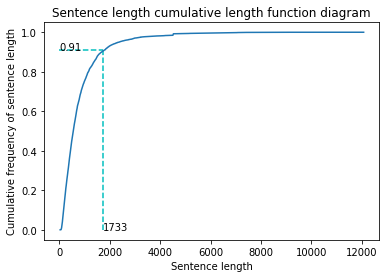

In [6]:
sent_pentage_list=[(count/sum(sent_freq)) for count in accumulate(sent_freq)]

quantile=0.91

# Find the sentence length with quantile.
for length,per in zip(sent_length,sent_pentage_list):
    if round(per,2)==quantile:
        index=length
        break
print('\n The sentence length is %d in the quantile dimension %s.'%(index, quantile))

# draw CDF
plt.plot(sent_length,sent_pentage_list)
plt.title('Sentence length cumulative length function diagram')
plt.xlabel('Sentence length')
plt.ylabel('Cumulative frequency of sentence length')
plt.hlines(quantile,0,index,colors='c',linestyles='dashed')
plt.vlines(index,0,quantile,colors='c',linestyles='dashed')
plt.text(0,quantile,str(quantile))
plt.text(index,0,str(index))

plt.show()
plt.close()

Delete the unnecessary columns and show the data structure.

In [7]:
data = df
data = data.drop(['Helpfulness info','length','Unnamed: 0'],axis=1)
print(data.shape)
data

(9244, 3)


,Label,Title,Review
0,0,Curiously awful,Cola is by far my favorite drink. My wife and ...
1,0,What a ripe off - GIVE ME A BREAK,Sorry but I had these noodles and they are no ...
2,0,They taste like boogers,"If you don't like the sound of a salty, vinega..."
3,0,"I wouldn't cook with it, but it may have medi...",I do not understand the people who say that th...
4,1,I can finally have soda again!,I'd been hearing about Zevia and finally got t...
...,...,...,...
9239,0,Too Good To Be True: Contains MORE FRUCTOSE T...,"I enjoyed this product for a whole two days, a..."
9240,1,Best Coca Tea,"No need of tea bags, just pure whole - leaf co..."
9241,1,Don't tell the DEA how habit forming these th...,Once you've navigated the challenge of removin...
9242,1,Who can resist?,These are a real flashback! And they taste jus...


Mix the Review and Ttile columns into Review_title column since they both can be input.

In [8]:
data['Review_title'] = data['Review']+data['Title']
data = data.drop(['Review','Title'],axis=1)
print(data.shape)
data

(9244, 2)


,Label,Review_title
0,0,Cola is by far my favorite drink. My wife and ...
1,0,Sorry but I had these noodles and they are no ...
2,0,"If you don't like the sound of a salty, vinega..."
3,0,I do not understand the people who say that th...
4,1,I'd been hearing about Zevia and finally got t...
...,...,...
9239,0,"I enjoyed this product for a whole two days, a..."
9240,1,"No need of tea bags, just pure whole - leaf co..."
9241,1,Once you've navigated the challenge of removin...
9242,1,These are a real flashback! And they taste jus...


Define the preprocessing function to preprocess the data.

In [9]:
def preprocessing(text):
    # word segmentation
    token_words = word_tokenize(text)
    
    # delete stop words
    stop_words = stopwords.words('english')
    fileter_words = [word for word in token_words if word not in stop_words]
    
    #stemmer
    stemmer = PorterStemmer()
    fileterStem_words = [stemmer.stem(word) for word in fileter_words]
    
    return ' '.join(fileterStem_words) # Returns a string separated by spaces.

In [10]:
print(data['Review_title'][0]) # show an example before the processing

data['Review_title'] = data['Review_title'].apply(preprocessing) # processing

Cola is by far my favorite drink. My wife and I usually have a debate of Pepsi vs. Coke, me preferring Coke, and neither one of us will ever win. So I saw this bottle and was very hopeful to find something which would stop the argument once and for all. Fentiman's cola comes in a nice looking bottle, it has an old fashioned feel to it, and even the name "Curiosity" beckons something forth from the early 1900s -- a certain naivit&eacute; if you will. When I first opened the bottle I found that it was not as heavily carbonated as say my favorite Coke or my wife's Pepsi, something which might prove a boon to the product. I sniffed it, and it had a distinct smell of cheap no-brand colas (to which I have resorted in the past during periods of smaller wallets). That's not to say it was bad, it just is what it is. I took a sip of the liquid and managed to get out the words "This really isn't too--" before my face contorted in waves of disgust. It was one of the foulest sodas I have tasted to 

In [11]:
print(data['Review_title'][0])# show the example after processing

cola far favorit drink . my wife i usual debat pepsi vs. coke , prefer coke , neither one us ever win . so i saw bottl hope find someth would stop argument . fentiman 's cola come nice look bottl , old fashion feel , even name `` curios '' beckon someth forth earli 1900 -- certain naivit & eacut ; . when i first open bottl i found heavili carbon say favorit coke wife 's pepsi , someth might prove boon product . i snif , distinct smell cheap no-brand cola ( i resort past period smaller wallet ) . that 's say bad , . i took sip liquid manag get word `` thi realli n't -- '' face contort wave disgust . it one foulest soda i tast date , includ old tab drink . for first coupl second tast like cheaper cola , aftertast hit , vile . i would get someon gag gift ( emphasi word `` gag '' ) , i never purchas anoth bottl sake . have spent money bottl , howev , i wish wast , i guzzl whole thing ( limit carbon inde becam boon product ) . thi turn , end , mistak , everi time carbon would forc burp i 'd

In [12]:
dataset = data.values #Convert DataFrame into matrix /2-dimensional array
print(dataset.shape)

# extract the features(the second column)
features = dataset[:,1]
print(features[100])

# extract the labels(the first column)
target = dataset[:,0]

(9244, 2)
had quit buy i discov contain msg ( monosodium glutam ) . so sad . love dip , make bad ? … tast great , toxic msg !


Feature extraction and representation of the input text (tf-idf features used here)  
Digitization represents the text as a feature vector (sparse vector of 1*42725 dimensions)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_processed = tfidf.fit_transform(features)
print(X_processed.shape) # Each line of the 9244 texts in the feature matrix represents the feature vector of one text.
print(X_processed[0].shape)
print(X_processed[0])

(9244, 19044)
(1, 19044)
  (0, 1930)	0.0577800114900966
  (0, 4734)	0.098909265669047
  (0, 4878)	0.03321028750730763
  (0, 7469)	0.034178348869981307
  (0, 13806)	0.08896747768161908
  (0, 6270)	0.10483780527758912
  (0, 14038)	0.056155046056688245
  (0, 8743)	0.054029342649542005
  (0, 3938)	0.05146875593443512
  (0, 10556)	0.039964377187784214
  (0, 8440)	0.05355362854811988
  (0, 7644)	0.03781951965022013
  (0, 8995)	0.04567339266818363
  (0, 11665)	0.043760079766502896
  (0, 3034)	0.09500423645912344
  (0, 6945)	0.0702649981354811
  (0, 17016)	0.029537160589765594
  (0, 6244)	0.03800114775749713
  (0, 10948)	0.05663124820685671
  (0, 5998)	0.04402362888942669
  (0, 17420)	0.048770458028993435
  (0, 2206)	0.056510353372166165
  (0, 8826)	0.0686173197927789
  (0, 9977)	0.06212253133662953
  (0, 16889)	0.034507802959365785
  :	:
  (0, 16094)	0.047267111831492487
  (0, 18756)	0.07890549773912076
  (0, 15622)	0.11078832148288789
  (0, 6699)	0.03229438176049749
  (0, 8419)	0.04431430810

Split the data into 80% train data and 20% test data.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, target.tolist(), test_size=0.20, random_state=42)

Use a simple logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Save this model into models directory.

In [16]:
# save this model
joblib.dump(lr, 'models/LogisticRegressionClassifier.pkl')

['models/LogisticRegressionClassifier.pkl']

Using an example to be predicted and see the result label.

In [17]:
test_ex = 'I enjoyed this product for a whole two days, at the end of the day I thought "hmmmmm...this is good...too good...time to investigate with google". What this led me to was a whole lot of information indicating that this product is REALLY REALLY BAD. One of the most striking points is that it has more fructose than corn syrup, can you believe that? They market this EXTREMELY well by making you think that you are getting the sugar from its orginal source without any interference, but a great source states that "The agave starch is subject to an enzymatic and chemical process that converts the starch into a fructose-rich syrup--anywhere from 70 percent fructose and higher according to the agave nectar chemical profiles posted on agave nectar websites". BE WARY. Do a quit search online on this product (brand does not matter) and you will see that it is yet another gimmick geated to the newest health craze. I have emailed a well-known store and this company only to receive a typical "what are you talking about? this is a great product" response i.e. "this makes us lots of money right now, it is cheap to make, but we sell it for five bucks. We get to phillips screwdriver you. We like to do this." This is one of the first websites I found by just searching now [...] but I have digged and you can too. The information points you in an obvious direction. Make sure to tell your friends and families!!!! I have only e-mailed one store but I think I will come in to talk to the manager maybe not to pull off of shelves but to have an information pamplet next to this product...I imagine if it was pulled suddenly off of shelves people would be all upset and just find a new source... … Too Good To Be True: Contains MORE FRUCTOSE THAN HIGH FRUCTOSE CORN SYRUP'
test_ex = preprocessing(test_ex)
text_ex_processed = tfidf.transform([test_ex])
exp1= lambda x:"Negative" if  x==0 else "Positive"

# the result is 0(Negative) or 1(Positive)
exp1(lr.predict(text_ex_processed)[0])

'Negative'

In [19]:
# Evaluation model
print("The accuracy is " + str(lr.score(X_test, y_test)))

The accuracy is 0.869118442401298


This is another classification model that I realized based on DecisionTreeClassifier.

In [20]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier() 
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# save this model
joblib.dump(dt, 'models/DecisionTreeClassifier.pkl')

['models/DecisionTreeClassifier.pkl']

Using an example to be predicted and see the result label.

In [22]:
test_ex = 'I enjoyed this product for a whole two days, at the end of the day I thought "hmmmmm...this is good...too good...time to investigate with google". What this led me to was a whole lot of information indicating that this product is REALLY REALLY BAD. One of the most striking points is that it has more fructose than corn syrup, can you believe that? They market this EXTREMELY well by making you think that you are getting the sugar from its orginal source without any interference, but a great source states that "The agave starch is subject to an enzymatic and chemical process that converts the starch into a fructose-rich syrup--anywhere from 70 percent fructose and higher according to the agave nectar chemical profiles posted on agave nectar websites". BE WARY. Do a quit search online on this product (brand does not matter) and you will see that it is yet another gimmick geated to the newest health craze. I have emailed a well-known store and this company only to receive a typical "what are you talking about? this is a great product" response i.e. "this makes us lots of money right now, it is cheap to make, but we sell it for five bucks. We get to phillips screwdriver you. We like to do this." This is one of the first websites I found by just searching now [...] but I have digged and you can too. The information points you in an obvious direction. Make sure to tell your friends and families!!!! I have only e-mailed one store but I think I will come in to talk to the manager maybe not to pull off of shelves but to have an information pamplet next to this product...I imagine if it was pulled suddenly off of shelves people would be all upset and just find a new source... … Too Good To Be True: Contains MORE FRUCTOSE THAN HIGH FRUCTOSE CORN SYRUP'
test_ex = preprocessing(test_ex)
text_ex_processed = tfidf.transform([test_ex])
exp1= lambda x:"Negative" if  x==0 else "Positive"

# the result is 0(Negative) or 1(Positive)
exp1(dt.predict(text_ex_processed)[0])

'Negative'

I used the accuracy_score function to see the accuracy of this model

In [25]:
# Evaluation model
y_pred = dt.predict(X_test) 


from sklearn.metrics import accuracy_score 
print("The accuracy is " + str(accuracy_score(y_test, y_pred))) # y_test = y_true

The accuracy is 0.8085451595457004


This is another classification model that I realized based on MultinomialNB.

In [26]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes with prior polynomial distribution

# Trainer: input word vector and classification label, 
# alpha:0.0001 alpha smaller the alpha, the more iterations, and the higher the accuracy.
clf = MultinomialNB(alpha=0.0001).fit(X_train, y_train)

In [27]:
# save this model
joblib.dump(clf, 'models/MultinomialNBClassifier.pkl')

['models/MultinomialNBClassifier.pkl']

In [28]:
# Using an example to be predicted and see the result label.
test_ex = 'I enjoyed this product for a whole two days, at the end of the day I thought "hmmmmm...this is good...too good...time to investigate with google". What this led me to was a whole lot of information indicating that this product is REALLY REALLY BAD. One of the most striking points is that it has more fructose than corn syrup, can you believe that? They market this EXTREMELY well by making you think that you are getting the sugar from its orginal source without any interference, but a great source states that "The agave starch is subject to an enzymatic and chemical process that converts the starch into a fructose-rich syrup--anywhere from 70 percent fructose and higher according to the agave nectar chemical profiles posted on agave nectar websites". BE WARY. Do a quit search online on this product (brand does not matter) and you will see that it is yet another gimmick geated to the newest health craze. I have emailed a well-known store and this company only to receive a typical "what are you talking about? this is a great product" response i.e. "this makes us lots of money right now, it is cheap to make, but we sell it for five bucks. We get to phillips screwdriver you. We like to do this." This is one of the first websites I found by just searching now [...] but I have digged and you can too. The information points you in an obvious direction. Make sure to tell your friends and families!!!! I have only e-mailed one store but I think I will come in to talk to the manager maybe not to pull off of shelves but to have an information pamplet next to this product...I imagine if it was pulled suddenly off of shelves people would be all upset and just find a new source... … Too Good To Be True: Contains MORE FRUCTOSE THAN HIGH FRUCTOSE CORN SYRUP'
test_ex = preprocessing(test_ex)
text_ex_processed = tfidf.transform([test_ex])
exp1= lambda x:"Negative" if  x==0 else "Positive"

# the result is 0(Negative) or 1(Positive)
exp1(clf.predict(text_ex_processed)[0])

'Negative'

This is another function to see the accuracy of the model.

In [29]:
y_pred = clf.predict(X_test) 

# Classification accuracy：
from sklearn import metrics
def metrics_result(actual, predict):
    print('accuracy:{0:.3f}'.format(metrics.precision_score(actual, predict,average='weighted')))
    print('recall:{0:0.3f}'.format(metrics.recall_score(actual, predict,average='weighted')))
    print('f1-score:{0:.3f}'.format(metrics.f1_score(actual, predict,average='weighted')))

In [30]:
metrics_result(y_test, y_pred)

accuracy:0.822
recall:0.818
f1-score:0.815


As we can see from above results, all the three classification models' accuracy are around 80%.  
And the result for LogisticRegression classifier is the best (more than 86%),  
I used three different methods to verify the accuracy of the model, including metrics, accuracy_score and score.
In the next task, I will try to add different ways of data processing and different classifiers to try to improve the accuracy of the results.

# Review Helpfulness Classification

This is still a binary classification task, and whether it is a helpful review can be judged according to the title and content of the review.  
Same as the task1, the data still need to be preprocessed at first.

In [31]:
data = df
# delete unnecessary columns
data = data.drop(['length','Unnamed: 0'],axis=1)
print(data.shape)
data

(9244, 4)


,Label,Title,Review,Helpfulness info
0,0,Curiously awful,Cola is by far my favorite drink. My wife and ...,1 out of 14 users found this review helpful
1,0,What a ripe off - GIVE ME A BREAK,Sorry but I had these noodles and they are no ...,10 out of 34 users found this review helpful
2,0,They taste like boogers,"If you don't like the sound of a salty, vinega...",4 out of 19 users found this review helpful
3,0,"I wouldn't cook with it, but it may have medi...",I do not understand the people who say that th...,3 out of 20 users found this review helpful
4,1,I can finally have soda again!,I'd been hearing about Zevia and finally got t...,34 out of 35 users found this review helpful
...,...,...,...,...
9239,0,Too Good To Be True: Contains MORE FRUCTOSE T...,"I enjoyed this product for a whole two days, a...",7 out of 12 users found this review helpful
9240,1,Best Coca Tea,"No need of tea bags, just pure whole - leaf co...",6 out of 17 users found this review helpful
9241,1,Don't tell the DEA how habit forming these th...,Once you've navigated the challenge of removin...,19 out of 19 users found this review helpful
9242,1,Who can resist?,These are a real flashback! And they taste jus...,38 out of 40 users found this review helpful


The labels will be decided by the content of helpfulness info, if there is half of people thinking this review is helpful, then the label is 1, otherwise, it's 0.

In [32]:
for index,row in data.iterrows():
    if (int(row['Helpfulness info'].split(" ")[0])/int(row['Helpfulness info'].split(" ")[3]))>0.5:
        row['Label']=1
        data.iloc[index] = row
    else:
        row['Label']=0
        data.iloc[index] = row

Mix the Review and Title columns into one column since both of them are features.

In [33]:
data['Review_title'] = data['Review']+data['Title']
# delete unnecessary columns
data = data.drop(['Review','Title', 'Helpfulness info'],axis=1)
print(data.shape)
data

(9244, 2)


,Label,Review_title
0,0,Cola is by far my favorite drink. My wife and ...
1,0,Sorry but I had these noodles and they are no ...
2,0,"If you don't like the sound of a salty, vinega..."
3,0,I do not understand the people who say that th...
4,1,I'd been hearing about Zevia and finally got t...
...,...,...
9239,1,"I enjoyed this product for a whole two days, a..."
9240,0,"No need of tea bags, just pure whole - leaf co..."
9241,1,Once you've navigated the challenge of removin...
9242,1,These are a real flashback! And they taste jus...


Improve the preprocessing function.

In [34]:
import string
import nltk.stem


def preprocessing(text):
    # Convert to lowercase
    lower = text.lower()
    
    # String.punctuation contains English punctuation, so we put it in the variable remove to be removed.
    # The function needs three parameters. The first two represent the mapping of characters, which we don't need.
    remove = str.maketrans('','',string.punctuation) 
    without_punctuation = lower.translate(remove)
    
    # Word segmentation
    tokens = word_tokenize(without_punctuation)
    
    # Remove stop words.
    stop_words = stopwords.words('english')
    without_stopwords  = [word for word in tokens if word not in stop_words]
    
    # Stemmer
    s = nltk.stem.SnowballStemmer('english')
    cleaned_text = [s.stem(ws) for ws in without_stopwords]
    
    return ' '.join(cleaned_text) # Returns a string separated by spaces.

In [35]:
data['Review_title'] = data['Review_title'].apply(preprocessing)

In [36]:
print(data['Review_title'][0])# show an example after preprocessing

cola far favorit drink wife usual debat pepsi vs coke prefer coke neither one us ever win saw bottl hope find someth would stop argument fentiman cola come nice look bottl old fashion feel even name curios beckon someth forth earli 1900s certain naiviteacut first open bottl found heavili carbon say favorit coke wife pepsi someth might prove boon product snif distinct smell cheap nobrand cola resort past period smaller wallet that say bad took sip liquid manag get word realli isnt face contort wave disgust one foulest soda tast date includ old tab drink first coupl second tast like cheaper cola aftertast hit vile would get someon gag gift emphasi word gag never purchas anoth bottl sake spent money bottl howev wish wast guzzl whole thing limit carbon inde becam boon product turn end mistak everi time carbon would forc burp id get noth bad tast first coupl second instead got horribl aftertast may close cola howev import rememb evolv reason tast one reason give coke day even pepsi … curiou

In [37]:
dataset = data.values #Convert DataFrame into matrix /2-dimensional array
print(dataset.shape)

# extract the features(the second column)
features = dataset[:,1]
print(features[100])

# extract the labels(the first column)
target = dataset[:,0]

(9244, 2)
quit buy discov contain msg monosodium glutam sad love dip make bad … tast great toxic msg


Feature extraction and representation of the input text (tf-idf features used here)  
Digitization represents the text as a feature vector (sparse vector of 1*42725 dimensions)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_processed = tfidf.fit_transform(features)
print(X_processed.shape) # Each line of the 9244 texts in the feature matrix represents the feature vector of one text.
print(X_processed[0].shape)
print(X_processed[0])

(9244, 24147)
(1, 24147)
  (0, 3037)	0.0578853142716922
  (0, 6501)	0.06954937350978897
  (0, 6668)	0.03365177579313667
  (0, 9784)	0.03421839683193244
  (0, 17719)	0.08915439911423292
  (0, 8275)	0.10490671439327505
  (0, 17972)	0.05636836624110493
  (0, 11345)	0.05239325016624598
  (0, 5531)	0.05158079116300351
  (0, 13514)	0.04000511704070022
  (0, 11010)	0.053588828952928554
  (0, 9999)	0.03784437814137094
  (0, 11630)	0.045798411344532344
  (0, 15031)	0.043909817241948826
  (0, 11248)	0.04539992973317033
  (0, 4375)	0.09506668204259862
  (0, 9148)	0.07031118280018643
  (0, 21629)	0.029615616594333326
  (0, 8238)	0.03803834386256546
  (0, 14036)	0.05685232908332681
  (0, 7973)	0.04438558962247182
  (0, 22144)	0.048833442412441426
  (0, 3379)	0.05654749721038049
  (0, 11424)	0.06866242145066977
  (0, 12819)	0.06216336401800095
  :	:
  (0, 8667)	0.10490671439327505
  (0, 2782)	0.09214806012687023
  (0, 20396)	0.047379869314526465
  (0, 23762)	0.08160930621989786
  (0, 19808)	0.111062

Split the data into 75% train data and 25% test data.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, target.tolist(), test_size=0.25, random_state=42)

A KNN classifier will be implemented and fed with train data.

In [40]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Using an example to be predicted and see the result label.

In [41]:
test_ex = 'I enjoyed this product for a whole two days, at the end of the day I thought "hmmmmm...this is good...too good...time to investigate with google". What this led me to was a whole lot of information indicating that this product is REALLY REALLY BAD. One of the most striking points is that it has more fructose than corn syrup, can you believe that? They market this EXTREMELY well by making you think that you are getting the sugar from its orginal source without any interference, but a great source states that "The agave starch is subject to an enzymatic and chemical process that converts the starch into a fructose-rich syrup--anywhere from 70 percent fructose and higher according to the agave nectar chemical profiles posted on agave nectar websites". BE WARY. Do a quit search online on this product (brand does not matter) and you will see that it is yet another gimmick geated to the newest health craze. I have emailed a well-known store and this company only to receive a typical "what are you talking about? this is a great product" response i.e. "this makes us lots of money right now, it is cheap to make, but we sell it for five bucks. We get to phillips screwdriver you. We like to do this." This is one of the first websites I found by just searching now [...] but I have digged and you can too. The information points you in an obvious direction. Make sure to tell your friends and families!!!! I have only e-mailed one store but I think I will come in to talk to the manager maybe not to pull off of shelves but to have an information pamplet next to this product...I imagine if it was pulled suddenly off of shelves people would be all upset and just find a new source... … Too Good To Be True: Contains MORE FRUCTOSE THAN HIGH FRUCTOSE CORN SYRUP'
test_ex = preprocessing(test_ex)
text_ex_processed = tfidf.transform([test_ex])
exp1= lambda x:"unhelpful" if  x==0 else "helpful"

# the result is 0(unhelpful) or 1(helpful)
exp1(knn.predict(text_ex_processed)[0])

'helpful'

In [42]:
y_pred = knn.predict(X_test) 

# Classification accuracy：
from sklearn import metrics
def metrics_result(actual, predict):
    print('accuracy:{0:.3f}'.format(metrics.precision_score(actual, predict,average='weighted')))
    print('recall:{0:0.3f}'.format(metrics.recall_score(actual, predict,average='weighted')))
    print('f1-score:{0:.3f}'.format(metrics.f1_score(actual, predict,average='weighted')))

In [43]:
metrics_result(y_test, y_pred)

accuracy:0.809
recall:0.829
f1-score:0.813


And I use the K-fold cross verification module.  
The influence of different parameters on the model is calculated by iteration, and the average accuracy rate after cross-validation is returned.

In [44]:
from sklearn.model_selection import cross_val_score # K-fold cross verification

k_range = range(1, 11)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_processed, target.tolist(), cv=10, scoring='accuracy')     # classification
    k_scores.append(scores.mean())

Show the influence of different K values on the accuracy of drawing

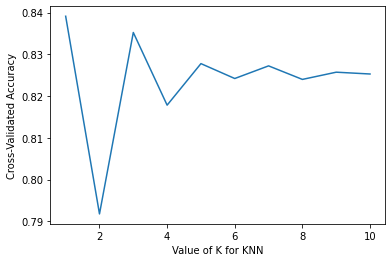

In [45]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [46]:
# Save Model
with open('models/KNeighborsClassifier.pickle', 'wb') as f:
    pickle.dump(knn, f)

Because it is also a binary classification task, according to the classification accuracy of LogisticRegression in Task 1, the LogisticRegression classifier is also used here.

In [47]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Save Model
joblib.dump(lr, 'models/LogisticRegressionClassifier2.pkl')

['models/LogisticRegressionClassifier2.pkl']

Using an example to be predicted and see the result label.

In [49]:
test_ex = 'I enjoyed this product for a whole two days, at the end of the day I thought "hmmmmm...this is good...too good...time to investigate with google". What this led me to was a whole lot of information indicating that this product is REALLY REALLY BAD. One of the most striking points is that it has more fructose than corn syrup, can you believe that? They market this EXTREMELY well by making you think that you are getting the sugar from its orginal source without any interference, but a great source states that "The agave starch is subject to an enzymatic and chemical process that converts the starch into a fructose-rich syrup--anywhere from 70 percent fructose and higher according to the agave nectar chemical profiles posted on agave nectar websites". BE WARY. Do a quit search online on this product (brand does not matter) and you will see that it is yet another gimmick geated to the newest health craze. I have emailed a well-known store and this company only to receive a typical "what are you talking about? this is a great product" response i.e. "this makes us lots of money right now, it is cheap to make, but we sell it for five bucks. We get to phillips screwdriver you. We like to do this." This is one of the first websites I found by just searching now [...] but I have digged and you can too. The information points you in an obvious direction. Make sure to tell your friends and families!!!! I have only e-mailed one store but I think I will come in to talk to the manager maybe not to pull off of shelves but to have an information pamplet next to this product...I imagine if it was pulled suddenly off of shelves people would be all upset and just find a new source... … Too Good To Be True: Contains MORE FRUCTOSE THAN HIGH FRUCTOSE CORN SYRUP'
test_ex = preprocessing(test_ex)
text_ex_processed = tfidf.transform([test_ex])
exp1= lambda x:"Negative" if  x==0 else "Positive"

exp1(lr.predict(text_ex_processed)[0])

'Positive'

In [50]:
# use the cross_val_score function to see the accuracy of this model
scores = cross_val_score(knn, X_processed, target.tolist(), cv=10, scoring='accuracy')
print(scores.mean())

0.8252939042939043


From the above results, we can see that the accuracy of the two different classifiers is above 80%, and the result of LogisticRegression classifier is better than that of KNN classifier.And by constantly adjusting the parameters and adopting the cross_val_score verification method, the accuracy of the results can be greatly improved.

Through this assignment, I learned a lot about how to get data from web pages, how to prreprocess data, and how to train data by neural network models and how to classify or predict new data.  
Among these two binary classification tasks, there are many things in common.  
First, they use the same data, and the way to preprocess the data is similar.  
Most importantly, they are both binary classification tasks.  
In task one, the accuracy of LogisticRegression classifier training is the highest, and the accuracy of other models training is about 80%.  Another difference is that we operate the dataframe to get the labels in different ways.  



Of course, I think there are still many areas for improvement in this assignment, such as:
1. I can try more different methods to preprocess the data, and divide the data into train data, test data and valid data.
2. I can define the my own model according to the characteristics of the data set, and set different hyperparameters including learning rate, epoch, optimization parameters, etc. to improve the accuracy of the results.
3. Gpu training model can be adopted to improve efficiency.
4. Use different methods to verify the accuracy of the model, compare the results of the model, and choose the appropriate model.